In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import trange
import random

In [9]:
data = pd.read_csv("/content/sample_data/201901.csv",encoding='cp949')

In [19]:
data.describe()

,날짜,시간,계약전력,유효전력량,지상무효전력량,진상무효전력량
count,8.936500e+04,89365.000000,89365.000000,89364.000000,89364.000000,89364.000000
mean,2.019010e+07,1198.926537,745.194259,33.888642,6.169496,1.069799
std,1.119985e+00,692.975237,2043.422956,116.104103,30.135489,4.098691
min,2.019010e+07,15.000000,3.000000,0.000000,0.000000,0.000000
25%,2.019010e+07,600.000000,7.000000,0.170000,0.000000,0.000000
50%,2.019010e+07,1200.000000,60.000000,1.290000,0.030000,0.020000
75%,2.019010e+07,1800.000000,425.000000,13.660000,0.580000,0.220000
max,2.019010e+07,2400.000000,20000.000000,1530.000000,300.960000,47.430000


,날짜,시간,시/도,읍_면_동,고객번호,계약종별,계약전력,공급방식,고저압구분,유효전력량,지상무효전력량,진상무효전력량
0,20190101,1000,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.58,0.18,0.0
1,20190101,1015,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.18,0.0
2,20190101,1030,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.14,0.0
3,20190101,815,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.18,0.0
4,20190101,830,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.14,0.0


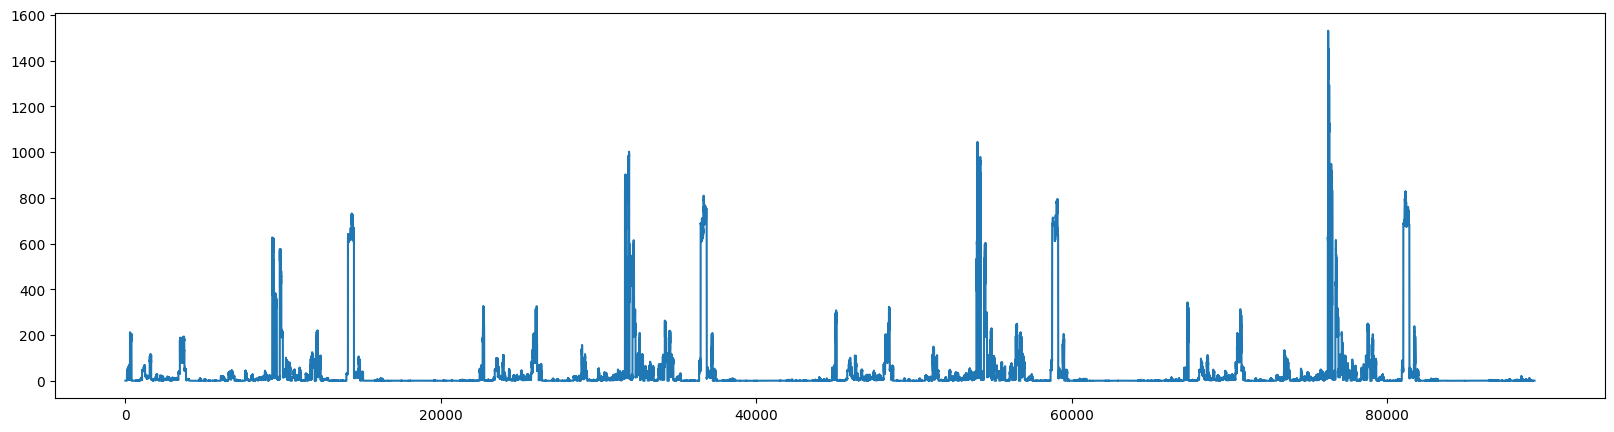

In [14]:
plt.figure(figsize=(20,5))
plt.plot(range(len(data)), data["유효전력량"])
data.head()

,날짜,시간,시/도,읍_면_동,고객번호,계약종별,계약전력,공급방식,고저압구분,유효전력량,지상무효전력량,진상무효전력량
0,20190101,1000,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.58,0.18,0.0
1,20190101,1015,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.18,0.0
2,20190101,1030,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.14,0.0
3,20190101,815,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.18,0.0
4,20190101,830,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.14,0.0


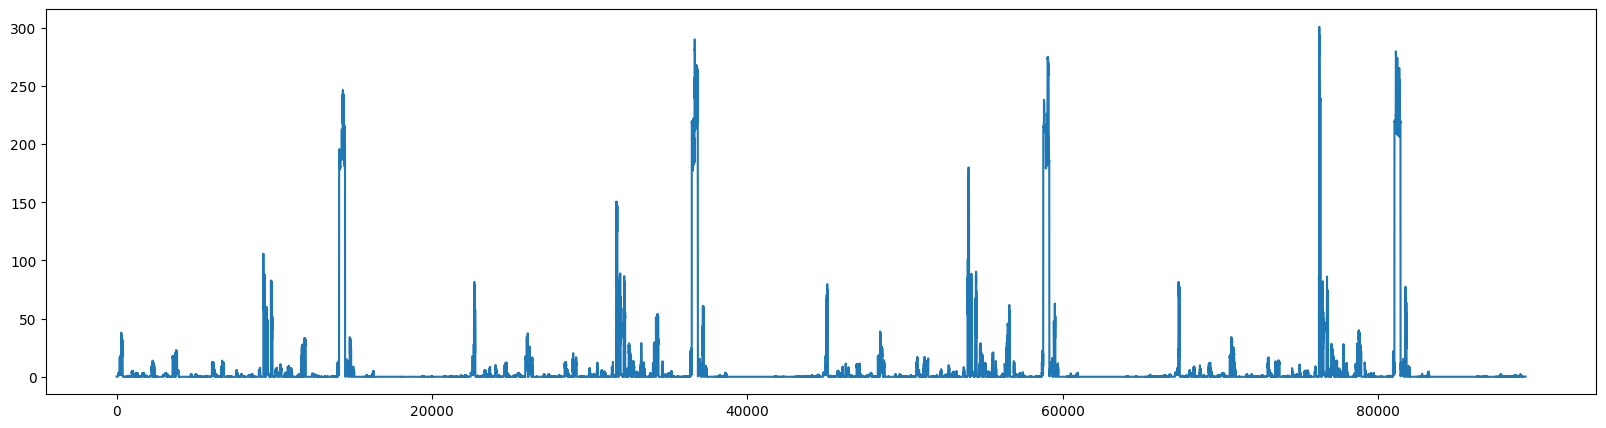

In [18]:
plt.figure(figsize=(20,5))
plt.plot(range(len(data)), data["지상무효전력량"])
data.head()

,날짜,시간,시/도,읍_면_동,고객번호,계약종별,계약전력,공급방식,고저압구분,유효전력량,지상무효전력량,진상무효전력량
0,20190101,1000,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.58,0.18,0.0
1,20190101,1015,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.18,0.0
2,20190101,1030,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.14,0.0
3,20190101,815,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.18,0.0
4,20190101,830,경기도,BB001동,b72c577b37,심야전력(을)II,750,삼상4선(22.9kV-y),고압,0.54,0.14,0.0


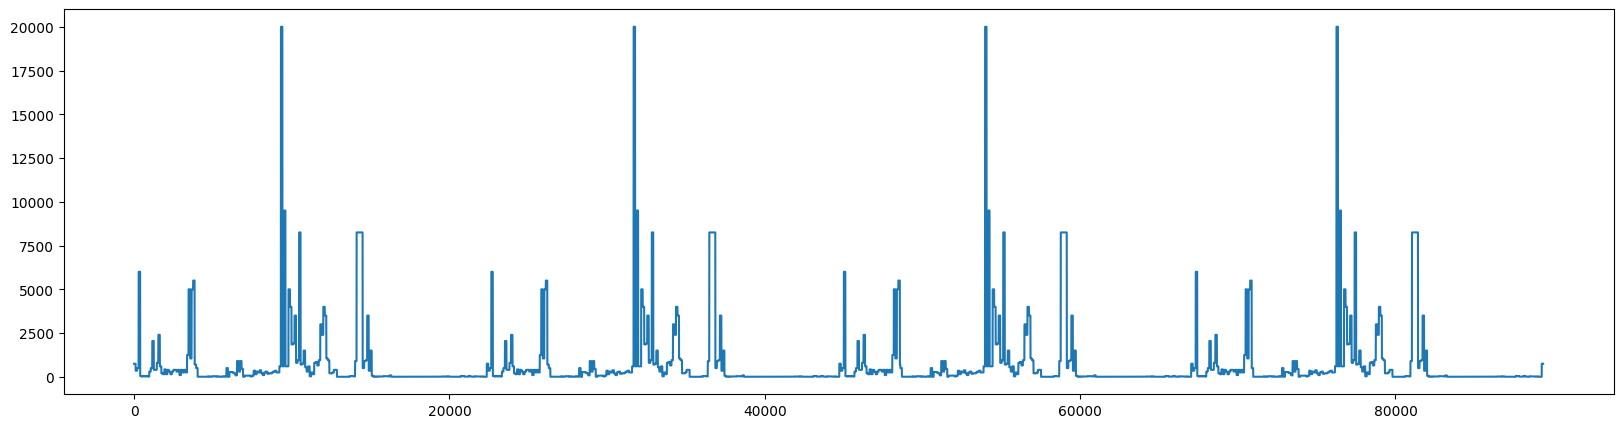

In [15]:
plt.figure(figsize=(20,5))
plt.plot(range(len(data)), data["계약전력"])
data.head()

In [21]:
d = data.sort_values(by=["시간"], axis = 0)
d

,날짜,시간,시/도,읍_면_동,고객번호,계약종별,계약전력,공급방식,고저압구분,유효전력량,지상무효전력량,진상무효전력량
31198,20190102,15,경기도,BB002동,e1d708a27a,일반용(을)고압A,300,삼상4선(22.9kV-y),고압,4.60,0.00,7.82
8812,20190101,15,경기도,BB004동,713a9d7fa2,일반용(갑)II고압A,250,삼상4선(22.9kV-y),고압,13.92,0.01,0.98
44148,20190102,15,경기도,BB004동,3c2bea3c0b,일반용(갑)I고압A,20,삼상4선(22.9kV-y),고압,0.28,0.26,0.00
28702,20190102,15,경기도,BB002동,5fa482f777,일반용(갑)I고압A,200,삼상4선(22.9kV-y),고압,2.45,0.00,2.67
28608,20190102,15,경기도,BB006동,54dfd391cd,산업용(갑)I고압A,245,삼상4선(22.9kV-y),고압,1.85,0.02,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
56480,20190103,2400,경기도,BB005동,6e73e61ff9,일반용(을)고압A,3000,삼상4선(22.9kV-y),고압,84.00,3.84,0.00
26385,20190102,2400,경기도,BB004동,ae87c4eab4,교육용(갑)고압A,500,삼상4선(22.9kV-y),고압,4.00,0.00,1.31
73744,20190104,2400,경기도,BB002동,0679e1cd50,일반용(을)고압A,900,삼상4선(22.9kV-y),고압,34.02,11.63,0.00
26196,20190102,2400,경기도,BB002동,b6807b269f,주택용전력,5500,삼상4선(22.9kV-y),고압,49.62,19.68,0.00
